In [1]:
#Dependencies
!pip install omdb
import pandas as pd
import numpy as np
import os as os
import csv
import json
import seaborn as sns
import matplotlib.pyplot as plt
import requests
import json
import omdb
import time
from pprint import pprint
from config import omdb_key
!pip install omdb

#Pulling in Data
csv_path = "Resources/tmdb_5000_credits.csv"
csv_path2 = "Resources/tmdb_5000_movies.csv"
actors = pd.read_csv(csv_path, encoding="utf-8")
movies = pd.read_csv(csv_path2, encoding="utf-8")


# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [2]:
actors.columns = ['ID', 'Title', 'Cast', 'Crew']

In [3]:
actor_name = input ("What actor would you like to know about?")

What actor would you like to know about?Tom Cruise


In [4]:
selected_actor = actors[actors['Cast'].str.contains(actor_name)]
selected_actor = selected_actor.reset_index(drop=True)
moviecount = len(selected_actor.index)
print (str(actor_name) + " has been in " + str(moviecount) + " movies")

Tom Cruise has been in 34 movies


In [5]:
print (str(actor_name) + " has been in the following movies")
movies_played_in = pd.DataFrame(selected_actor["Title"])
movies_played_in

Tom Cruise has been in the following movies


,Title
0,Edge of Tomorrow
1,Mission: Impossible - Rogue Nation
2,Mission: Impossible III
3,Mission: Impossible - Ghost Protocol
4,The Last Samurai
5,War of the Worlds
6,Mission: Impossible II
7,Knight and Day
8,Oblivion
9,Minority Report


In [6]:
movies_played_in["Year Released"] = ""
movies_played_in["Rated"] = ""
movies_played_in["Rotten Tomato"] = ""
movies_played_in["Meta Score"] = ""
movies_played_in["Plot Sentiment"] = ""
movies_played_in["Plot"] = ""
movies_played_in["Genre"] = ""
movies_played_in.head()

,Title,Year Released,Rated,Rotten Tomato,Meta Score,Plot Sentiment,Plot,Genre
0,Edge of Tomorrow,,,,,,,
1,Mission: Impossible - Rogue Nation,,,,,,,
2,Mission: Impossible III,,,,,,,
3,Mission: Impossible - Ghost Protocol,,,,,,,
4,The Last Samurai,,,,,,,


In [7]:
#Access the data from Omdb
print("Beginning Data Retrieval")
print("---------------------------------------------------------------")

for index, row in movies_played_in.iterrows():
    movie_pull = row["Title"]
         
    
    try:
        url = "http://www.omdbapi.com/?t=%s&apikey=%s" % (movie_pull, omdb_key)
        #Print log of movie being processed
        print(f"Now retrieving Movie Data for: " + movie_pull)
        #Run requests to API
        movie_data = requests.get(url).json()
        pprint(movie_data)
        # Rating = movie_data["Ratings"]
        RT = movie_data["Ratings"][1]["Value"]
        Meta = movie_data["Metascore"]
        Year = movie_data["Year"]
        Rated = movie_data["Rated"]
        Plot = movie_data["Plot"]
        Sent = analyzer.polarity_scores(Plot)["compound"]
        Genre = movie_data["Genre"]
        #place in df
        movies_played_in.set_value(index, "Rated", Rated)
        movies_played_in.set_value(index, "Year Released", Year)
        movies_played_in.set_value(index, "Rotten Tomato", RT)
        movies_played_in.set_value(index, "Meta Score", Meta)
        movies_played_in.set_value(index, "Plot", Plot)
        movies_played_in.set_value(index, "Plot Sentiment", Sent)
        movies_played_in.set_value(index, "Genre", Genre)
        
    except:
        movies_played_in.set_value(index, "Year Released", "N/A")
        movies_played_in.set_value(index, "Rated,", "N/A")
        movies_played_in.set_value(index, "Rotten Tomato", "N/A")
        movies_played_in.set_value(index, "Meta Score", "N/A")
        movies_played_in.set_value(index, "Plot Sentiment", "N/A")
        movies_played_in.set_value(index, "Plot", "N/A")
        movies_played_in.set_value(index, "Genre", "N/A")
        
        
pprint(movie_data)
movies_played_in.sort_values(["Year Released"], ascending=True, inplace=True)
#family_and_generosity = happiness_df.sort_values(["Family","Generosity"], ascending=False)
movies_played_in = movies_played_in.reset_index(drop=True)
movies_played_in.head()  

Beginning Data Retrieval
---------------------------------------------------------------
Now retrieving Movie Data for: Edge of Tomorrow
{'Actors': 'Tom Cruise, Emily Blunt, Brendan Gleeson, Bill Paxton',
 'Awards': '11 wins & 37 nominations.',
 'BoxOffice': '$77,121,429',
 'Country': 'USA, Canada',
 'DVD': '07 Oct 2014',
 'Director': 'Doug Liman',
 'Genre': 'Action, Adventure, Sci-Fi',
 'Language': 'English',
 'Metascore': '71',
 'Plot': 'A soldier fighting aliens gets to relive the same day over and over '
         'again, the day restarting every time he dies.',
 'Poster': 'https://images-na.ssl-images-amazon.com/images/M/MV5BMTc5OTk4MTM3M15BMl5BanBnXkFtZTgwODcxNjg3MDE@._V1_SX300.jpg',
 'Production': 'Warner Bros. Pictures',
 'Rated': 'PG-13',
 'Ratings': [{'Source': 'Internet Movie Database', 'Value': '7.9/10'},
             {'Source': 'Rotten Tomatoes', 'Value': '90%'},
             {'Source': 'Metacritic', 'Value': '71/100'}],
 'Released': '06 Jun 2014',
 'Response': 'True',
 'Ru

C:\Users\Craig\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:25: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\Craig\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:26: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\Craig\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:27: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\Craig\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:28: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\Craig\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:29: FutureWarning: set_value is deprecated and will be removed in a future rele

{'Actors': 'Tom Cruise, Philip Seymour Hoffman, Ving Rhames, Billy Crudup',
 'Awards': '7 wins & 14 nominations.',
 'BoxOffice': '$133,400,000',
 'Country': 'USA, Germany, China, Italy',
 'DVD': '30 Oct 2006',
 'Director': 'J.J. Abrams',
 'Genre': 'Action, Adventure, Thriller',
 'Language': 'English, Italian, Mandarin, Cantonese, German, Czech',
 'Metascore': '66',
 'Plot': 'Agent Ethan Hunt comes into conflict with a dangerous and sadistic '
         'arms dealer who threatens his life and his fiancee in response.',
 'Poster': 'https://ia.media-imdb.com/images/M/MV5BOThhNTA1YjItYzk2Ny00M2Y1LWJlYWUtZDQyZDU0YmY5Y2M5XkEyXkFqcGdeQXVyNjU0OTQ0OTY@._V1_SX300.jpg',
 'Production': 'Paramount Pictures',
 'Rated': 'PG-13',
 'Ratings': [{'Source': 'Internet Movie Database', 'Value': '6.9/10'},
             {'Source': 'Rotten Tomatoes', 'Value': '70%'},
             {'Source': 'Metacritic', 'Value': '66/100'}],
 'Released': '05 May 2006',
 'Response': 'True',
 'Runtime': '126 min',
 'Title': 'Miss

Now retrieving Movie Data for: Tropic Thunder
{'Actors': 'Jeff Kahn, Robert Downey Jr., Anthony Ruivivar, Jack Black',
 'Awards': 'Nominated for 1 Oscar. Another 10 wins & 43 nominations.',
 'BoxOffice': '$110,416,702',
 'Country': 'USA, UK, Germany',
 'DVD': '18 Nov 2008',
 'Director': 'Ben Stiller',
 'Genre': 'Action, Comedy',
 'Language': 'English, Mandarin',
 'Metascore': '71',
 'Plot': 'Through a series of freak occurrences, a group of actors shooting a '
         'big-budget war movie are forced to become the soldiers they are '
         'portraying.',
 'Poster': 'https://ia.media-imdb.com/images/M/MV5BNDE5NjQzMDkzOF5BMl5BanBnXkFtZTcwODI3ODI3MQ@@._V1_SX300.jpg',
 'Production': 'DreamWorks/Paramount Studios',
 'Rated': 'R',
 'Ratings': [{'Source': 'Internet Movie Database', 'Value': '7.0/10'},
             {'Source': 'Rotten Tomatoes', 'Value': '82%'},
             {'Source': 'Metacritic', 'Value': '71/100'}],
 'Released': '13 Aug 2008',
 'Response': 'True',
 'Runtime': '107 min',

{'Actors': 'Tom Cruise, Nicole Kidman, Robert Duvall, Randy Quaid',
 'Awards': 'Nominated for 1 Oscar. Another 1 win & 1 nomination.',
 'BoxOffice': 'N/A',
 'Country': 'USA',
 'DVD': '25 May 1999',
 'Director': 'Tony Scott',
 'Genre': 'Action, Drama, Sport',
 'Language': 'English, French',
 'Metascore': '60',
 'Plot': 'A young hot-shot stock car driver gets his chance to compete at the '
         'top level.',
 'Poster': 'https://ia.media-imdb.com/images/M/MV5BNjc5NjQ1ODIzN15BMl5BanBnXkFtZTgwMjkwNTg4NjE@._V1_SX300.jpg',
 'Production': 'Paramount Home Video',
 'Rated': 'PG-13',
 'Ratings': [{'Source': 'Internet Movie Database', 'Value': '5.9/10'},
             {'Source': 'Rotten Tomatoes', 'Value': '38%'},
             {'Source': 'Metacritic', 'Value': '60/100'}],
 'Released': '27 Jun 1990',
 'Response': 'True',
 'Runtime': '107 min',
 'Title': 'Days of Thunder',
 'Type': 'movie',
 'Website': 'N/A',
 'Writer': 'Robert Towne (story), Tom Cruise (story), Robert Towne '
           '(screen

{'Actors': 'Pat Healy, Genevieve Zweig, Mark Flanagan, Neil Flynn',
 'Awards': 'Nominated for 3 Oscars. Another 28 wins & 53 nominations.',
 'BoxOffice': 'N/A',
 'Country': 'USA',
 'DVD': '25 Jul 2000',
 'Director': 'Paul Thomas Anderson',
 'Genre': 'Drama',
 'Language': 'English, German, French',
 'Metascore': '77',
 'Plot': 'An epic mosaic of interrelated characters in search of love, '
         'forgiveness, and meaning in the San Fernando Valley.',
 'Poster': 'https://images-na.ssl-images-amazon.com/images/M/MV5BZjk3YThkNDktNjZjMS00MTBiLTllNTAtYzkzMTU0N2QwYjJjXkEyXkFqcGdeQXVyMTMxODk2OTU@._V1_SX300.jpg',
 'Production': 'New Line Cinema',
 'Rated': 'R',
 'Ratings': [{'Source': 'Internet Movie Database', 'Value': '8.0/10'},
             {'Source': 'Rotten Tomatoes', 'Value': '83%'},
             {'Source': 'Metacritic', 'Value': '77/100'}],
 'Released': '07 Jan 2000',
 'Response': 'True',
 'Runtime': '188 min',
 'Title': 'Magnolia',
 'Type': 'movie',
 'Website': 'http://www.magnoliamo

{'Actors': 'Paul Newman, Tom Cruise, Mary Elizabeth Mastrantonio, Helen Shaver',
 'Awards': 'Won 1 Oscar. Another 1 win & 10 nominations.',
 'BoxOffice': 'N/A',
 'Country': 'USA',
 'DVD': '06 Mar 2001',
 'Director': 'Martin Scorsese',
 'Genre': 'Drama, Sport',
 'Language': 'English, Spanish',
 'Metascore': '77',
 'Plot': 'Fast Eddie Felson teaches a cocky but immensely talented protégé the '
         'ropes of pool hustling, which in turn inspires him to make an '
         'unlikely comeback.',
 'Poster': 'https://ia.media-imdb.com/images/M/MV5BMGUxNDNkZGQtMWEyOS00MzI0LWFmMTUtMmEyNzk1YzBiYzljXkEyXkFqcGdeQXVyNjc1NTYyMjg@._V1_SX300.jpg',
 'Production': 'Touchstone Pictures',
 'Rated': 'R',
 'Ratings': [{'Source': 'Internet Movie Database', 'Value': '7.0/10'},
             {'Source': 'Rotten Tomatoes', 'Value': '89%'},
             {'Source': 'Metacritic', 'Value': '77/100'}],
 'Released': '17 Oct 1986',
 'Response': 'True',
 'Runtime': '119 min',
 'Title': 'The Color of Money',
 'Type': 

,Title,Year Released,Rated,Rotten Tomato,Meta Score,Plot Sentiment,Plot,Genre
0,Losin' It,1983,R,22%,51,-0.4019,"Set in 1965, four rowdy teenage guys travel to...","Comedy, Drama"
1,The Outsiders,1983,PG,65%,38,-0.4588,"The rivalry between two gangs, the poor Grease...","Crime, Drama"
2,Top Gun,1986,PG,54%,50,0.802,As students at the United States Navy's elite ...,"Action, Drama, Romance"
3,The Color of Money,1986,R,89%,77,0.8422,Fast Eddie Felson teaches a cocky but immensel...,"Drama, Sport"
4,Young Guns,1988,R,42%,50,-0.6597,"A group of young gunmen, led by Billy the Kid,...","Action, Crime, Drama"


In [8]:
movies_played_in['Rotten Tomato'] = movies_played_in['Rotten Tomato'].str.replace('%','')
movies_played_in['Rotten Tomato'] = movies_played_in['Rotten Tomato'].str.replace('/100','')
movies_played_in['Rotten Tomato'] = movies_played_in['Rotten Tomato'].str.replace('N/A','')
movies_played_in['Meta Score'] = movies_played_in['Meta Score'].str.replace('%','')
movies_played_in['Meta Score'] = movies_played_in['Meta Score'].str.replace('NaN','')
movies_played_in['Meta Score'] = movies_played_in['Meta Score'].str.replace('/100','')
movies_played_in['Meta Score'] = movies_played_in['Meta Score'].str.replace('N/A','')
#movies_played_in['Plot Sentiment'] = movies_played_in['Plot Sentiment'].str.replace('N/A','')
movies_played_in['Year Released'] = movies_played_in['Year Released'].str.replace('N/A','')


In [10]:
movies_played_in["Meta Score"] = pd.to_numeric(movies_played_in["Meta Score"])
movies_played_in['Rotten Tomato'] = pd.to_numeric(movies_played_in['Rotten Tomato'])
movies_played_in['Plot Sentiment'] = pd.to_numeric(movies_played_in['Plot Sentiment'])
movies_played_in['Year Released'] = pd.to_numeric(movies_played_in['Year Released'])

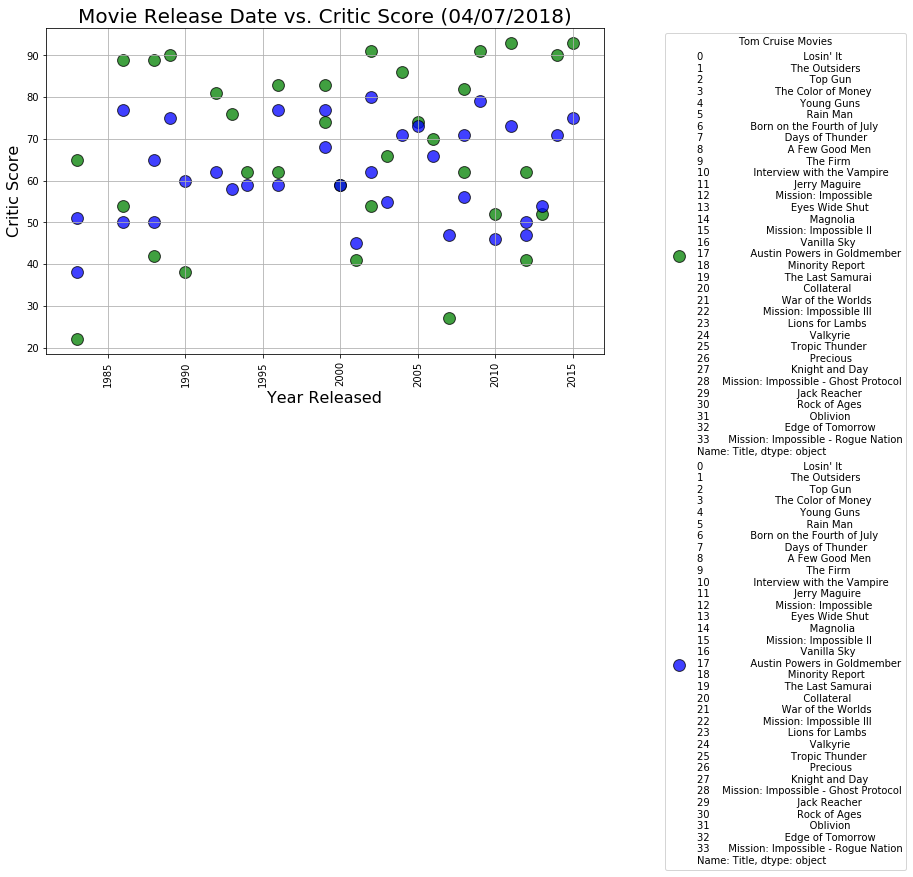

In [11]:
plt.figure(figsize=(10,6))
plt.title("Movie Release Date vs. Critic Score " + "(" + time.strftime("%m/%d/%Y") + ")", fontsize=20)
plt.xlabel("Year Released", fontsize=16)
plt.xticks(rotation= 90)
plt.ylabel("Critic Score", fontsize=16)
#set_xlim(1920, 2017)
plt.scatter(movies_played_in["Year Released"], movies_played_in["Rotten Tomato"], color= "green", edgecolor= "black",
label= (movies_played_in["Title"]), s=140, alpha = 0.75)
plt.scatter(movies_played_in["Year Released"], movies_played_in["Meta Score"], color= "Blue", edgecolor= "black",
label= (movies_played_in["Title"]), s=140, alpha = 0.75)
plt.legend(bbox_to_anchor= (1.1, 1), title= actor_name + " Movies", fontsize= "medium")
plt.grid()
plt.show()

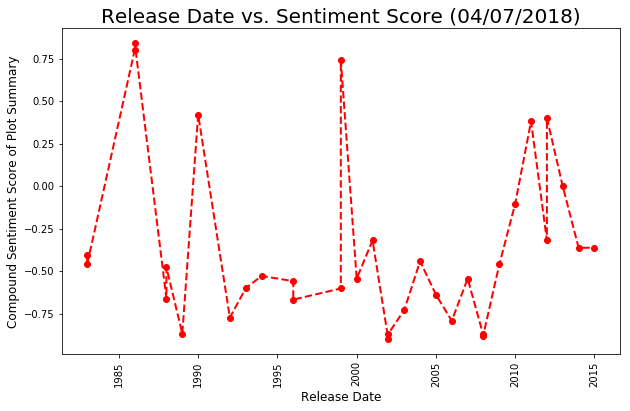

In [12]:
#Set size of bar plots
plt.figure(figsize=(10,6))

plt.plot(movies_played_in["Year Released"],movies_played_in["Plot Sentiment"], color= "Red", marker= "o", linestyle= "dashed",
linewidth= 2, markersize= 6)

#Aesthetics
plt.title("Release Date vs. Sentiment Score " + "(" + time.strftime("%m/%d/%Y") + ")", fontsize=20)
plt.xlabel("Release Date", fontsize=12)
plt.xticks(rotation= 90)
plt.ylabel("Compound Sentiment Score of Plot Summary", fontsize=12)


#Save plot as PNG image
#plt.savefig("Images/Movie_Release_Date_vs._Sentiment_Score.png", bbox_inches= "tight")

#Display Output
plt.show()

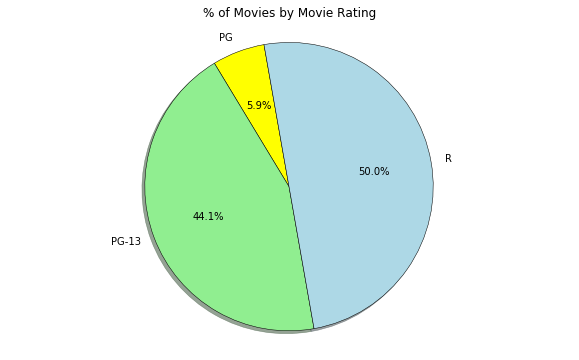

In [14]:
#Set size of pie chart
plt.figure(figsize=(10,6))

#Group "final" dataframe by "Rated"
rating = movies_played_in.groupby("Rated").count()
final_rating = pd.DataFrame(rating)

total_movies = rating["Title"]

#Set pie chart labels
labels = total_movies.index

#Define color and explode values for all pie chart use
colors = ["yellow", "lightgreen", "lightblue", "royalblue"]
#explode = [.00, .00, .00]

#Create pie chart for "% of Total Fares by City Type"
plt.pie(total_movies, startangle = 100, colors = colors, labels = labels, 
        autopct = "%1.1f%%", shadow = True, wedgeprops = {'linewidth': .5, 'edgecolor': 'black'})

#Save plot as PNG image
#plt.savefig("Images/Percent_of_Movies_by_Rating.png", bbox_inches= "tight")

#Format display
plt.title("% of Movies by Movie Rating")
plt.axis("equal")
plt.show()